<a href="https://colab.research.google.com/github/Saannrr/ML-AI-GDSC-UG-2021/blob/main/ML_AI_Week_1_GDSC_UG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df = df.drop('date',axis='columns')
df = df.drop('id',axis='columns')

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


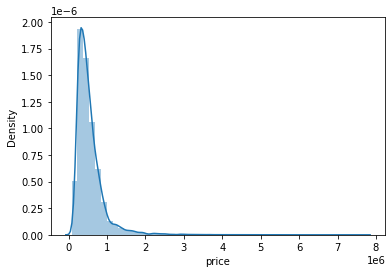

In [ ]:
sns.distplot(df['price'])

In [ ]:
from matplotlib import pyplot as plt

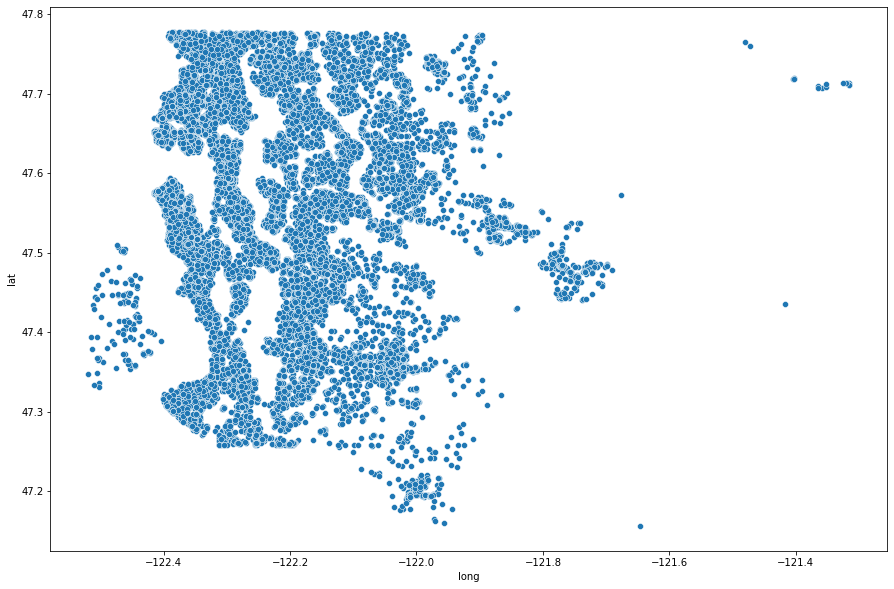

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x=df['long'], y=df['lat'])

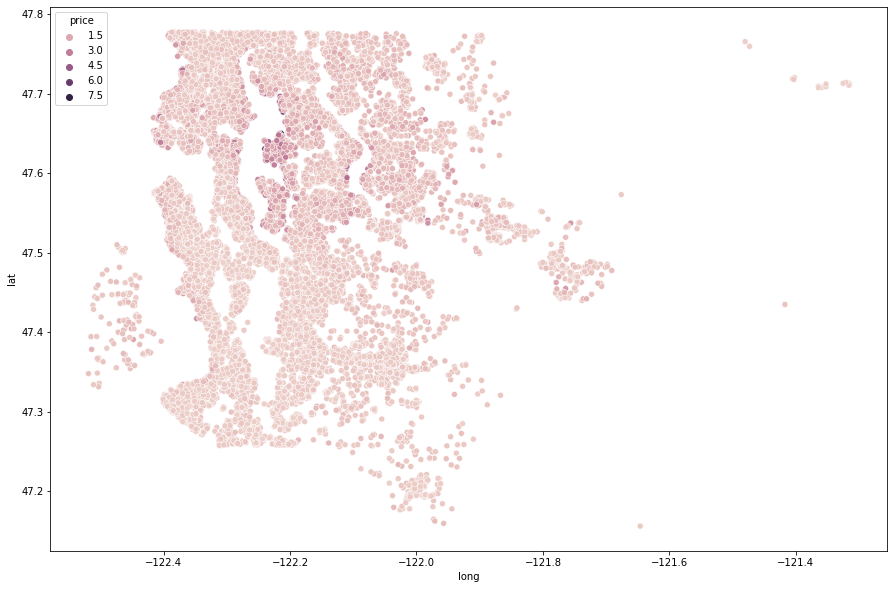

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x=df['long'], y=df['lat'], hue=df['price'])

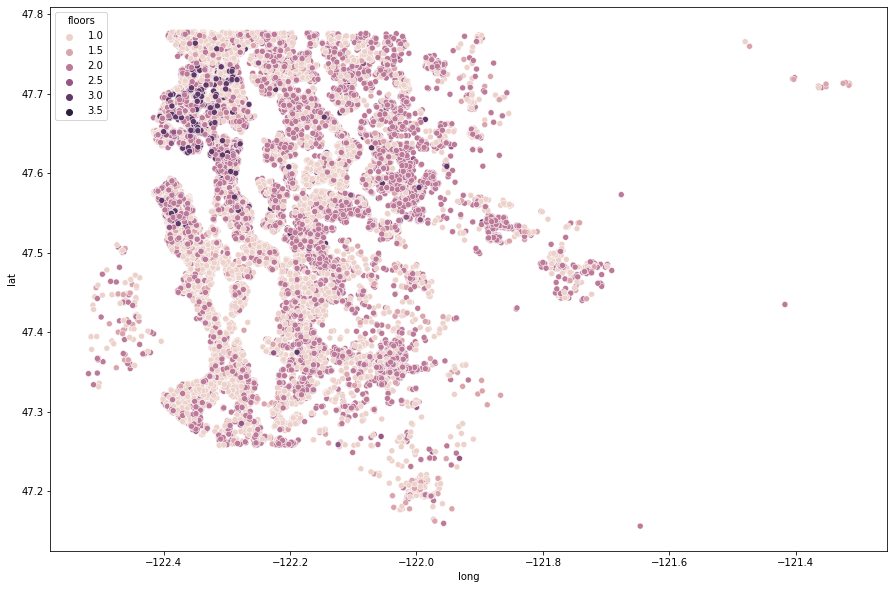

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x=df['long'], y=df['lat'], hue=df['floors'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = df.drop('price', axis=1).values
y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=128, epochs=375)

Epoch 1/375
119/119 [==============================] - 1s 3ms/step - loss: 429377617920.0000 - val_loss: 421025939456.0000
Epoch 2/375
119/119 [==============================] - 0s 2ms/step - loss: 429369425920.0000 - val_loss: 421012144128.0000
Epoch 3/375
119/119 [==============================] - 0s 2ms/step - loss: 429346488320.0000 - val_loss: 420977770496.0000
Epoch 4/375
119/119 [==============================] - 0s 2ms/step - loss: 429293076480.0000 - val_loss: 420899684352.0000
Epoch 5/375
119/119 [==============================] - 0s 2ms/step - loss: 429183991808.0000 - val_loss: 420758618112.0000
Epoch 6/375
119/119 [==============================] - 0s 2ms/step - loss: 429008420864.0000 - val_loss: 420547100672.0000
Epoch 7/375
119/119 [==============================] - 0s 2ms/step - loss: 428756271104.0000 - val_loss: 420254089216.0000
Epoch 8/375
119/119 [==============================] - 0s 2ms/step - loss: 428419612672.0000 - val_loss: 419874242560.0000
Epoch 9/375
119/

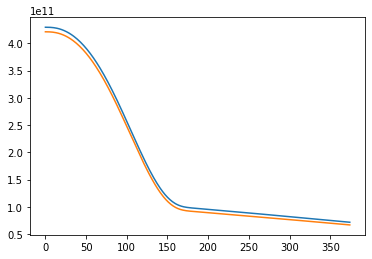

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses)

In [ ]:
test_house = df.drop('price', axis=1).iloc[0]
test_house = scaler.transform(test_house.values.reshape(-1,18))
test_house

array([[0.0625    , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00574235]])

In [ ]:
test_house = df.drop('price', axis=1).iloc[0]
test_house

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
Name: 0, dtype: float64

In [ ]:
test_house = df.drop('price', axis=1).iloc[0]
test_house = scaler.transform(test_house.values.reshape(-1,18))
test_house

array([[0.0625    , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00574235]])

In [ ]:
model.predict(test_house)

array([[220129.08]], dtype=float32)

In [ ]:
df['price'][0]

221900.0